In [1]:
import numpy as np
from scipy.signal import zpk2tf,freqz,sawtooth,square,impulse
from scipy.fft import fft,fftfreq
from math import pi
from numpy import exp,zeros_like,cos,sin,log10,angle,hamming
from numpy import convolve as conv
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy import signal

In [2]:
# Given Data in Question 1 as
f1 = 900    # formant frequency
b1 = 200    # bandwidth
fs = 16000  # sampling frequency
ts = 1.0/fs # sampling time

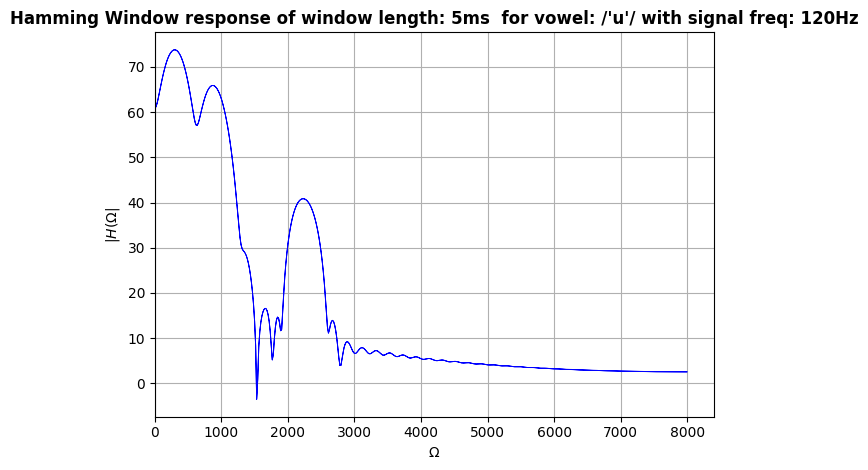

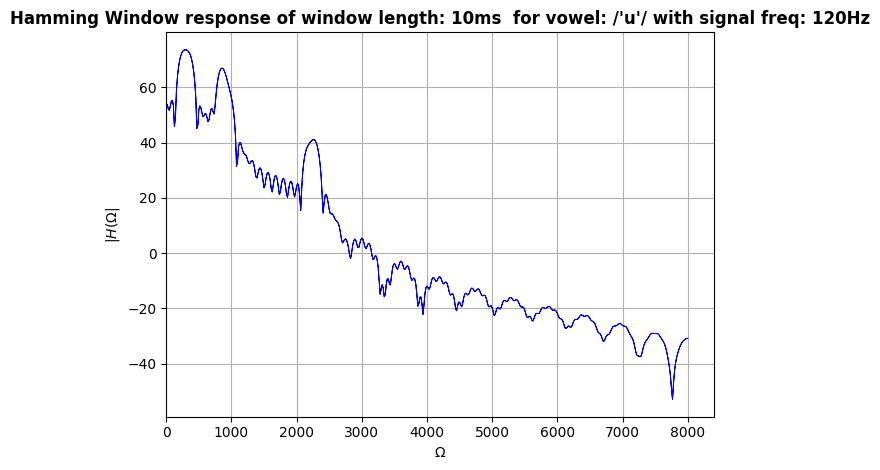

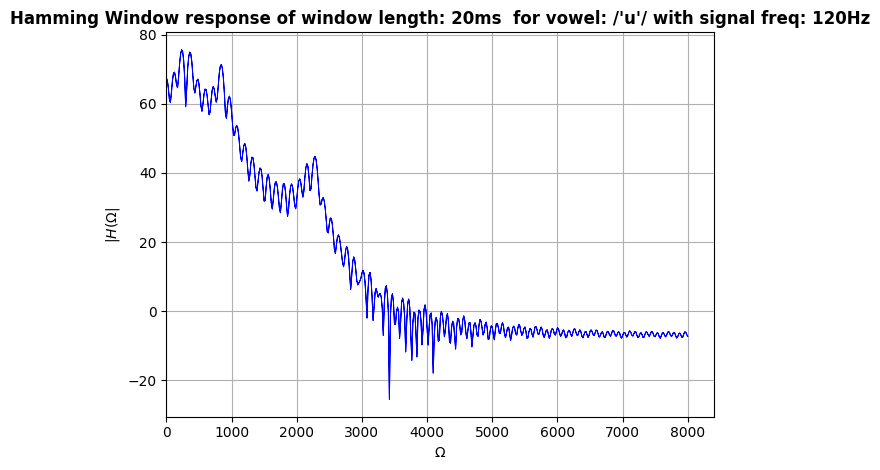

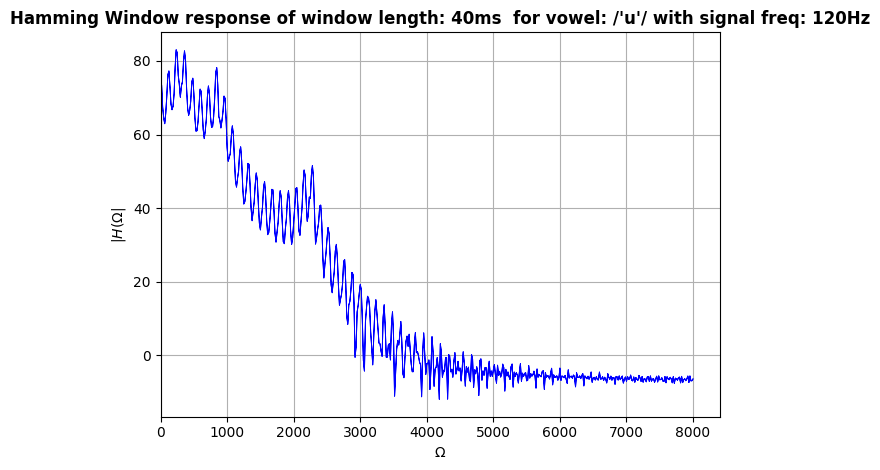

[]


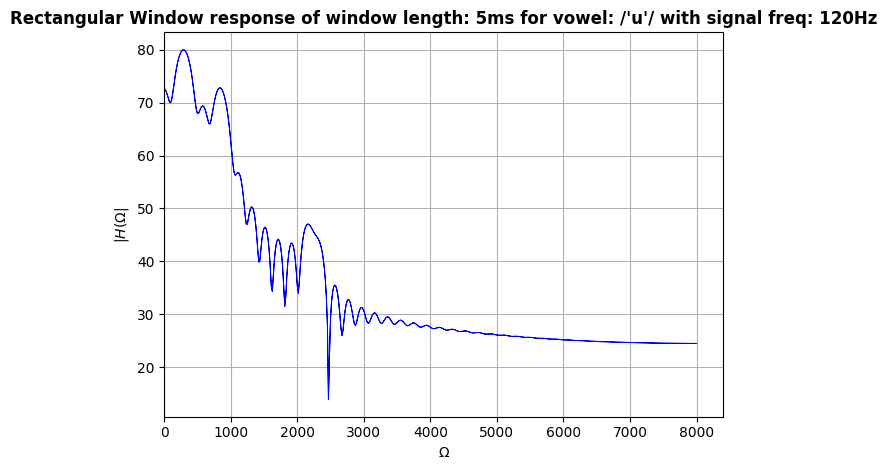

[]


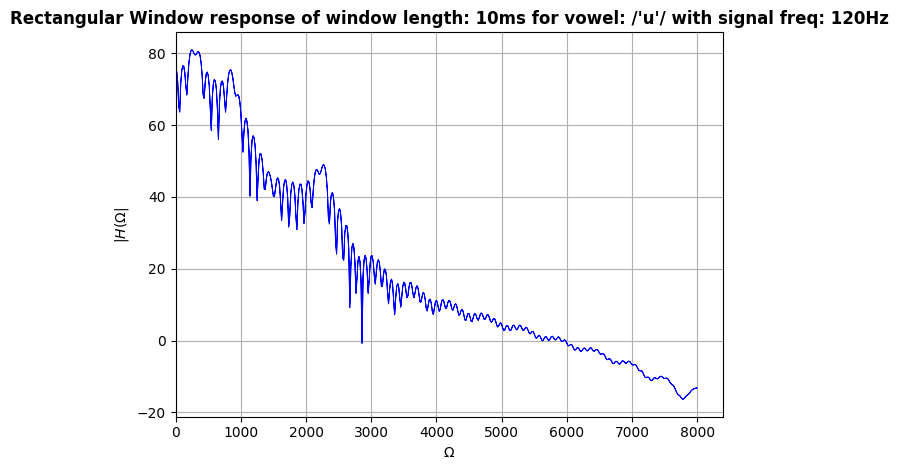

[]


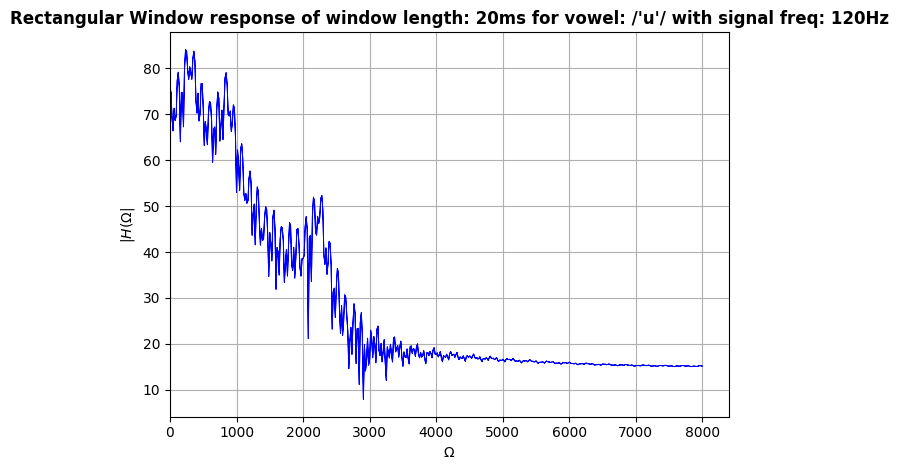

[]


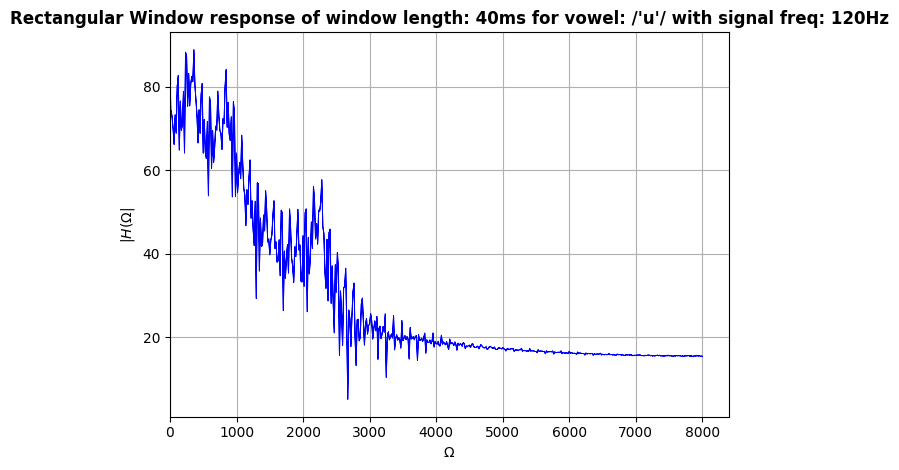

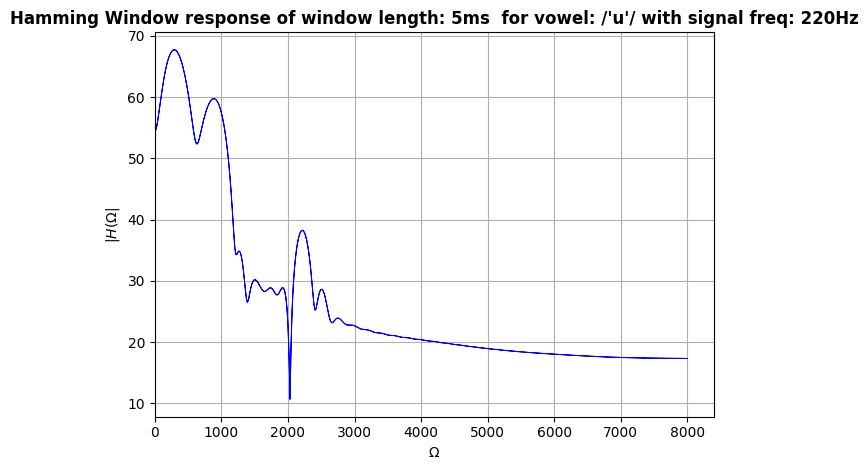

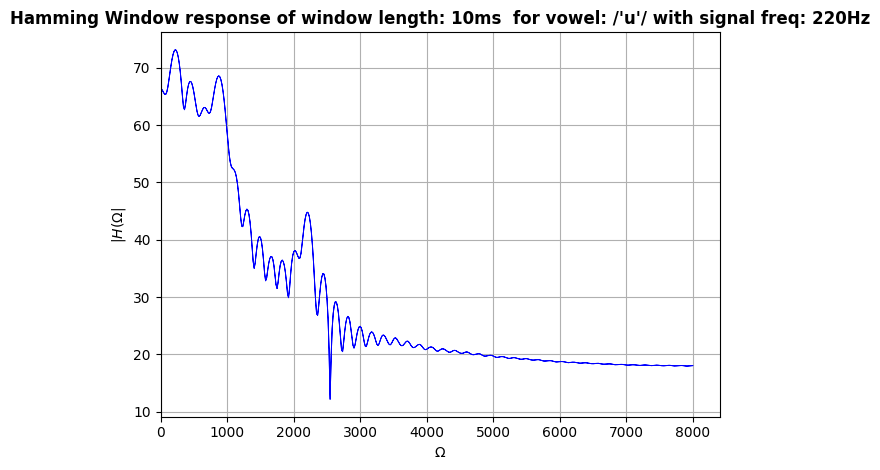

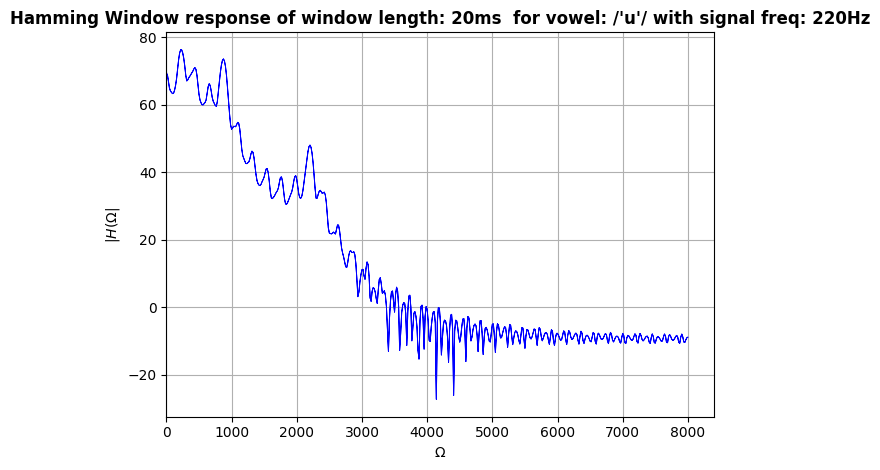

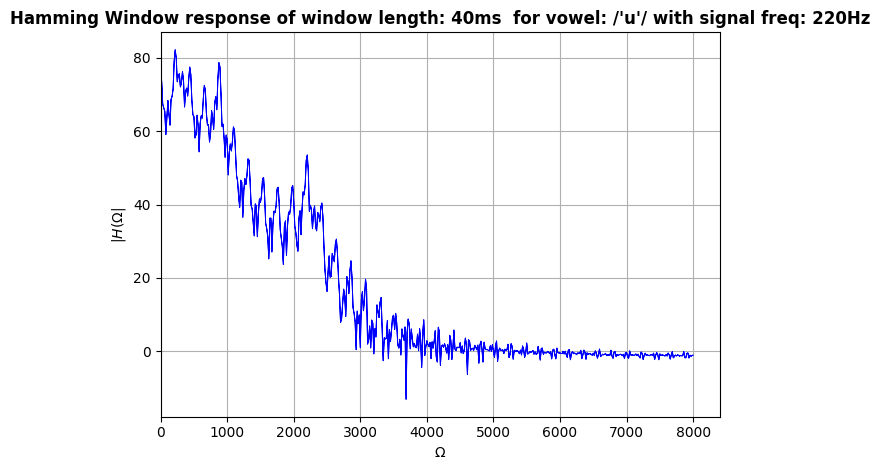

[]


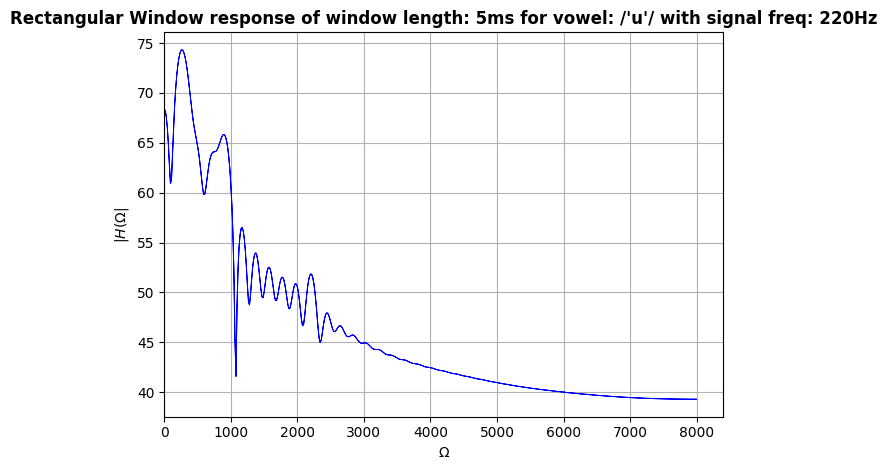

[]


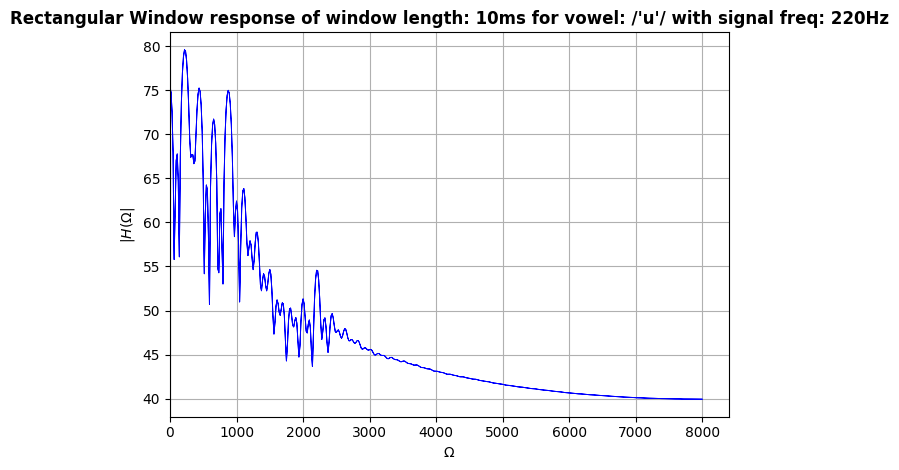

[]


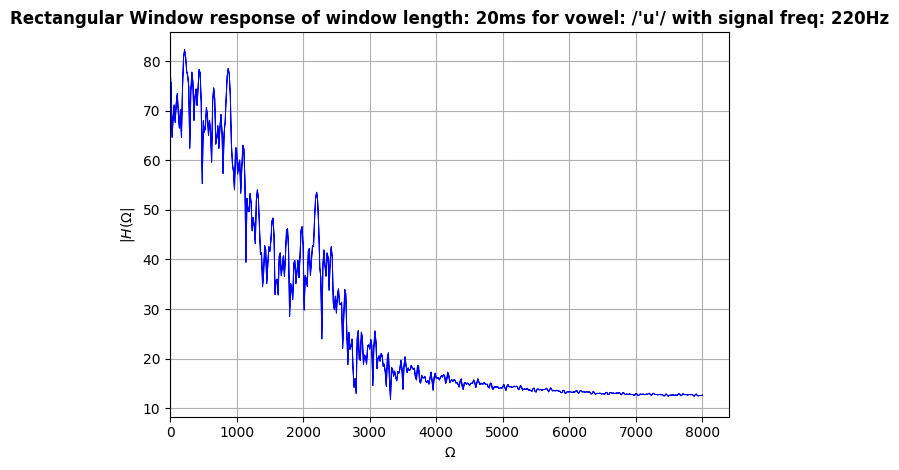

[]


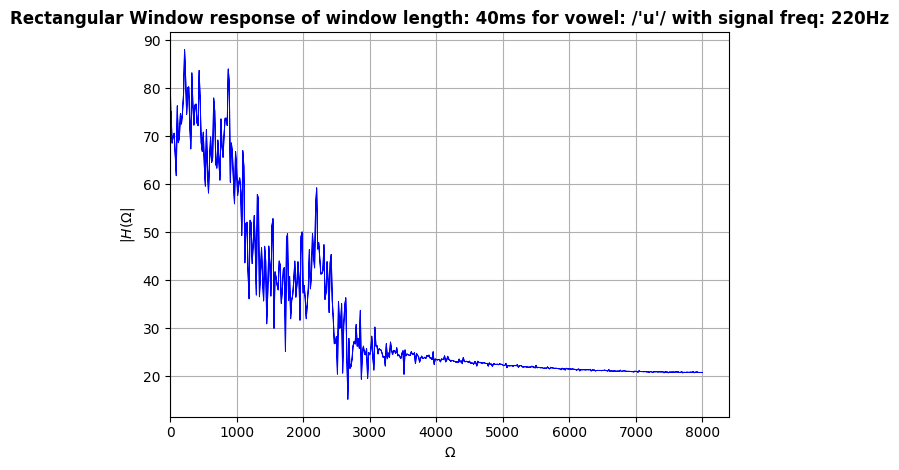

In [5]:
def generate_signal_response(t,sig,b,a):
    """
    Generates the excitation signal response from the signal and filter coefficients using the difference equation
    inputs: t (time-vector of the excitation signal)
            sig (excitation signal)
            b,a (filter numerator and denominator coefficients)
    output: returns the filter excitation response
    """
    y = zeros_like(sig)
    # difference equation
    for n in range(len(sig)):
        for k in range(len(b)):
            if (n-k)>=0:
                y[n] += b[k] * sig[n-k]
        for k in range(1,len(a)):
            if (n-k)>=0:
                y[n] -= a[k] * y[n-k]
    return y

def plot_magnitude_response(b,a,vowel,f0):
    """
    Plots the magnitude and phase response of the filter using the numerator and denominator
    coefficients of the filter.
    inputs: b,a (filter numerator and denominator coefficients)
            vowel (the vowel parameters being used)
            f0 (excitation signal frequency)
    outputs: None (saves the magnitude and frequency response)
    """
    w,h = freqz(b,a)
    plt.figure()
    s = "Vocal tract response for vowel: /'{}'/ with signal freq: {}Hz"
    plt.suptitle(s.format(vowel,f0) ,fontsize=12,weight=2)
    plt.subplot(1,2,1)
    plt.plot(fs * w/(2*pi),20*log10(abs(h)),'b')
    plt.title("Magnitude response",fontsize=12)
    plt.ylabel(r"$|H(\Omega|$",fontsize=10)
    plt.xlabel(r"$\Omega$")
    plt.subplot(1,2,2)
    angles = np.angle(h)
    plt.plot(fs * w/(2*pi),angles,'b')
    plt.title(r"Angle",fontsize=12)
    plt.ylabel(r"Angle (rad)",fontsize=10)
    plt.xlabel(r"$\Omega$",fontsize=10)
    plt.subplots_adjust(left=0.125,
                    wspace=0.4)
    plt.show()

def plot_and_save_waveform(t,y,f_signal,f_sampling,vowel):
    """
    Plots the output of the filter excited with the signal upto a few pitch periods.
    inputs: t(time-vector of the excitation signal)
            y( output response of the filter)
            f_signal ( excitation signal frequency )
            f_sampling (sampling frequency)
            vowel (the vowel being coded)
    outputs: None
    """
    plt.figure()
    plt.title("Excitation",fontsize=12)
    plt.plot(t[:2514],y[:2514],'b')
    plt.ylabel("Impulse Response",fontsize=10)
    plt.xlabel("Time (sec)",fontsize=10)
    plt.show()
    #write("E:\Courses\EE679_Speech\Assignment1"+"_"+str(f_signal)+"_"+vowel+".wav",f_sampling,y)

def hamming_window(win_length,fs,output_signal,vowel,f0):
    """
    Plots the Hamming Window Response for a given window length
    inputs: win_length (the length of window used)
            output_signal ( output response of the filter)
            f0 ( excitation signal frequency )
            fs (sampling frequency)
            vowel (the vowel being coded)
    outputs: None
    """
    window_size = int(win_length*fs/1000)
    window_signal = output_signal[:window_size] * hamming(window_size)
    dft = fft(window_signal, n=1024)
    freq = fftfreq(dft.shape[-1], 1/fs)


    len_ = int(len(dft)/2)
    s = "Hamming Window response of window length: {}ms  for vowel: /'{}'/ with signal freq: {}Hz"
    plt.figure()
    plt.title(s.format(win_length,vowel,f0) ,fontsize=12,weight="bold")
    plt.plot(abs(freq),20*log10(abs(dft)),'b',linewidth=0.7)
    plt.ylabel(r"$|H(\Omega|$",fontsize=10)
    plt.xlabel(r"$\Omega$")
    plt.xlim(xmin=0)
    plt.grid("True")
    plt.tight_layout()
    plt.show()

def rectangular_window(win_length,fs,output_signal,vowel,f0):
    """
    Plots the Rectamgilar Window Response for a given window length
    inputs: win_length (the length of window used)
            output_signal ( output response of the filter)
            f0 ( excitation signal frequency )
            fs (sampling frequency)
            vowel (the vowel being coded)
    outputs: None
    """
    window_size = int(win_length*fs/1000)
    window_signal = output_signal[:window_size]
    dft = fft(window_signal, n=1024)
    freq = fftfreq(dft.shape[-1], 1/fs)
    len_ = int(len(dft)/2)
    s = "Rectangular Window response of window length: {}ms for vowel: /'{}'/ with signal freq: {}Hz"
    plt.figure()
    plt.title(s.format(win_length,vowel,f0) ,fontsize=12,weight="bold")
    #plt.plot(freq[:len_],20*log10(abs(dft[:len_])),'b',linewidth=0.7)
    plt.plot(abs(freq),20*log10(abs(dft)),'b',linewidth=0.7)
    print(peaks)
    plt.ylabel(r"$|H(\Omega|$",fontsize=10)
    plt.xlabel(r"$\Omega$")
    plt.xlim(xmin=0)
    plt.grid("True")
    plt.tight_layout()
    plt.show()


def vocal_tract(formant_frequencies):
    """
    Given the formant frequencies calculates the numerator and denominator coefficients
    by convolving between the different formant frequencies
    inputs: formant_frequencies (list of the formant frequencies)
    outputs: numerator and denominator coefficients
    """
    global bw
    r = []
    theta = []
    for i in formant_frequencies:
        r.append(np.exp(-pi*bw*ts)) #radius in z-plane
        theta.append(2*pi*float(i)*ts) #angle in z-plane

    denom_coeffs = []
    num_coeffs = []
    convolved_a = 1
    for radius,angle in zip(r,theta):
        poles = [radius*exp(1j*angle),radius*exp(-1j*angle)]
        zeros = zeros_like(poles)
        b,a = zpk2tf(zeros,poles,k=1)
        num_coeffs.append(b)
        denom_coeffs.append(a)
        convolved_a = conv(convolved_a,a)

    denom_coeffs = zeros_like(convolved_a)
    denom_coeffs[0] = 1

    return denom_coeffs,convolved_a

def generate_vowels(formant_frequencies,bandwidth,signal_frequency,vowel,time,f_sampling, window, win_len):
    ts = 1.0/f_sampling # sampling time
    num_samples = int(f_sampling*time) # total number of signal samples

    b,a = vocal_tract(formant_frequencies)
    # plot_magnitude_response(b,a,vowel,signal_frequency)

    t = np.linspace(0,time,num_samples)

    # sawtooth approximation using square
    # sig = signal.sawtooth(2 * np.pi * signal_frequency * t)
    sig = square(2 * pi * signal_frequency* t, duty=0.01)+1
    #sig = signal.triang(2 * np.pi * signal_frequency * t)

    response = generate_signal_response(t,sig,b,a)
    # plot_and_save_waveform(t,response,signal_frequency,f_sampling,vowel)

    if window=="hamming":
        hamming_window(win_len,f_sampling,response,vowel,signal_frequency)
    elif window=="rectangular":
        rectangular_window(win_len,f_sampling,response,vowel,signal_frequency)


f0 = [120,220]
formants = [300,870,2240]
bw = 100
vow = "u"
duration = 0.5
fs = 16000 #sampling frequency
windows = ["hamming" , "rectangular"]
window_length = [5,10,20,40]
peaks = []
properties = {}

for sig_freq in f0:
  for window in windows:
    for win_len in window_length:
      generate_vowels(formants,bw,sig_freq,vow,duration,fs, window, win_len)